In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/ibrahimelsayed182/titanic-dataset?select=Titanic.csv

# Column Description
Attributes	| Definition	| Key
| --- | --- | --- |
sex	| Sex/Gender	|male/female
age	| Age	
sibsp	| siblings of the passenger	| 0/1 /2 …
parch	| parents / children aboard the Titanic	|0/1/2 …
fare	| Passenger fare	
embarked	| Port of Embarkation	|C : Cherbourg, Q : Queenstown, S : Southampton
class |	Ticket| class	First / Second / Third
who | categories to passengers|	male, female, child
alone |	he was alone in ship or no	|0/1
survived |		|0/1

# EDA

In [2]:
data = pd.read_csv('../Data/titanic.csv')
data

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [3]:
data.shape

(891, 10)

In [4]:
data.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [5]:
data.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
data['survived'].unique()

array([0, 1], dtype=int64)

# Transformation

## categorise age

In [7]:
data['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [6]:
def cat_age (string):
    # string=int(string)
    if str(string) == 'nan':
        return 'Unknown'
    elif int(string) <= 10:
        return 'Child'
    
    elif 10 <= int(string) <= 18:
        return 'Teen'
    
    elif 19 <= int(string) <= 45:
        return 'Adult'
    
    elif int(string) > 45:
        return 'Elder'

In [7]:
data['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [8]:
data['age_group']=data['age'].apply(cat_age)
data.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,age_group
0,male,22.0,1,0,7.2500,S,Third,man,False,0,Adult
1,female,38.0,1,0,71.2833,C,First,woman,False,1,Adult
2,female,26.0,0,0,7.9250,S,Third,woman,True,1,Adult
3,female,35.0,1,0,53.1000,S,First,woman,False,1,Adult
4,male,35.0,0,0,8.0500,S,Third,man,True,0,Adult


In [9]:
data['age_group'].value_counts()

age_group
Adult      474
Unknown    177
Elder      101
Teen        75
Child       64
Name: count, dtype: int64

In [10]:
def cat_age (string):
    # string=int(string)
    if str(string) == 'nan':
        return 'Unknown'
    elif int(string) <= 10:
        return 'Child'
    
    elif 11 <= int(string) <= 18:
        return 'Teen'
    
    elif 19 <= int(string) <= 30:
        return 'Young Adult'
    
    elif 31 <= int(string) <= 55:
        return 'Adult'
    
    elif int(string) > 56:
        return 'Elder'

In [11]:
data['age_group']=data['age'].apply(cat_age)
data['age_group'].value_counts()

age_group
Young Adult    272
Adult          264
Unknown        177
Teen            75
Child           64
Elder           35
Name: count, dtype: int64

In [12]:
data.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,age_group
0,male,22.0,1,0,7.2500,S,Third,man,False,0,Young Adult
1,female,38.0,1,0,71.2833,C,First,woman,False,1,Adult
2,female,26.0,0,0,7.9250,S,Third,woman,True,1,Young Adult
3,female,35.0,1,0,53.1000,S,First,woman,False,1,Adult
4,male,35.0,0,0,8.0500,S,Third,man,True,0,Adult


## survived

In [13]:
data['survived']=data['survived'].replace({0:'No', 1: 'Yes'})
# data['survived']=data['survived'].map({0:'Unalive', 1: 'Alive'})
data['survived'].value_counts()

survived
No     549
Yes    342
Name: count, dtype: int64

# Data Visualisation

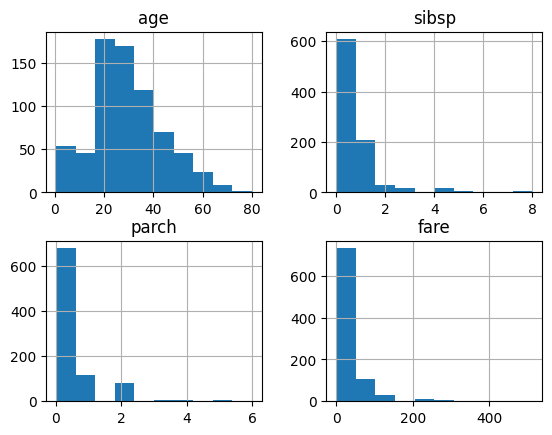

In [16]:
data.hist()
plt.show()

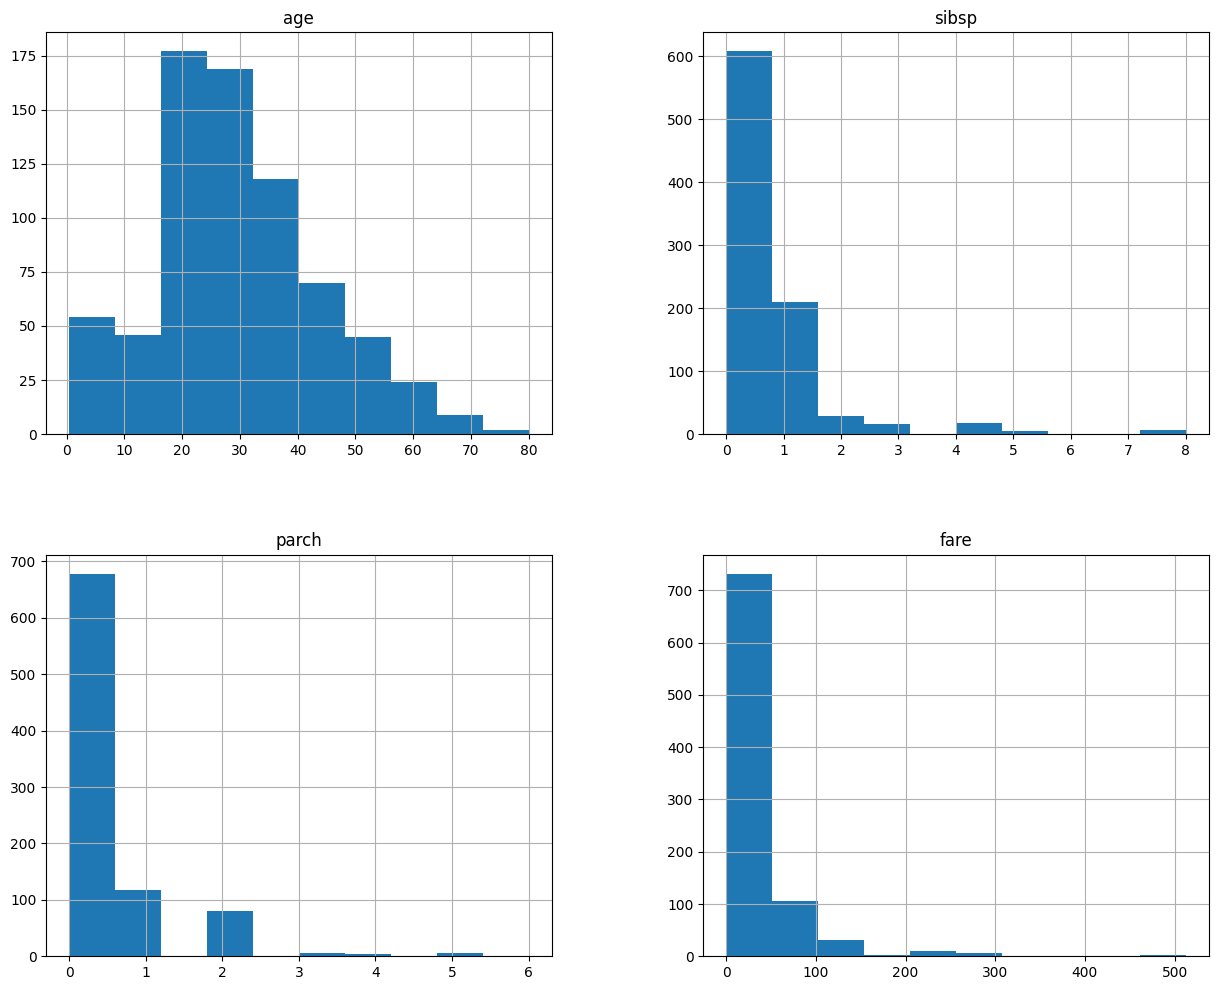

In [17]:
data.hist(figsize=(15, 12))
plt.show()

<Axes: xlabel='survived'>

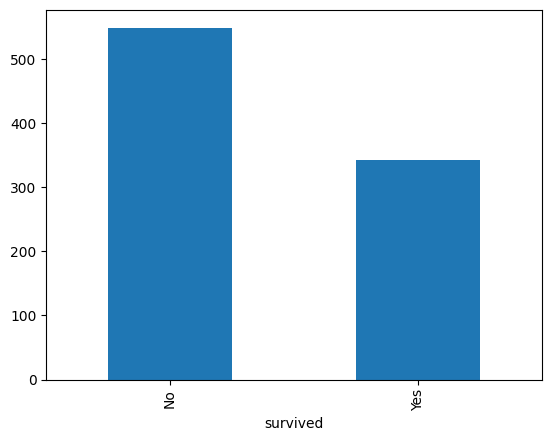

In [18]:
data['survived'].value_counts().plot(kind='bar')

<Axes: xlabel='class'>

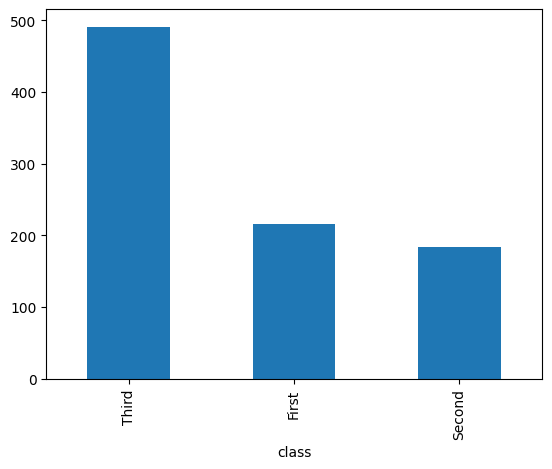

In [16]:
data['class'].value_counts().plot(kind='bar')

## Survivals

In [17]:
data['survived'].value_counts()

survived
No     549
Yes    342
Name: count, dtype: int64

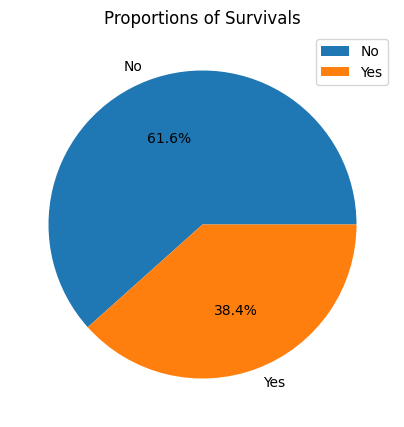

In [18]:
survived_counts = data['survived'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
plt.title('Proportions of Survivals')
plt.legend()
plt.show()

In [19]:
def plot_piechart (data, column_name):
    survived_counts = data[column_name].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
    plt.title(f'Proportions of {column_name}')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot

    plt.show()

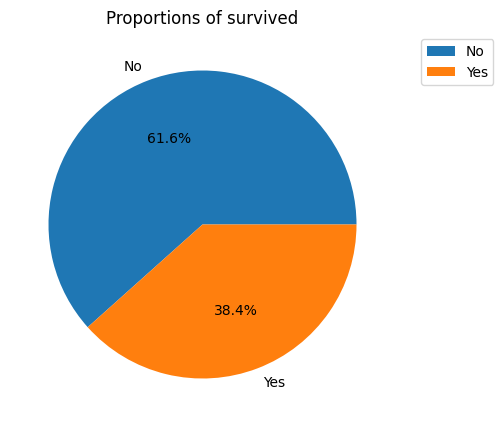

In [20]:
plot_piechart(data, 'survived')

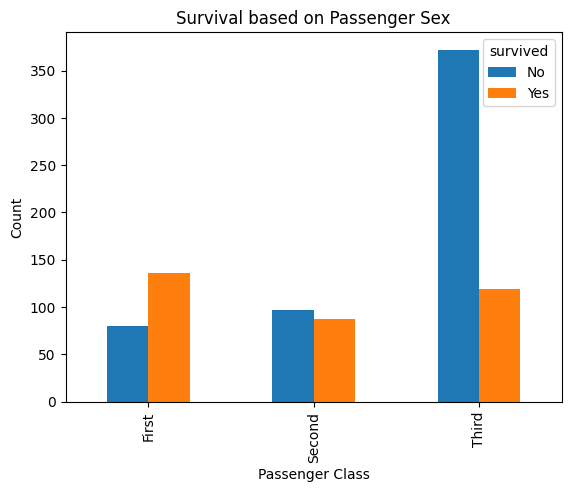

In [21]:
data.groupby(['class', 'survived']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Survival based on Passenger Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='class', ylabel='count'>

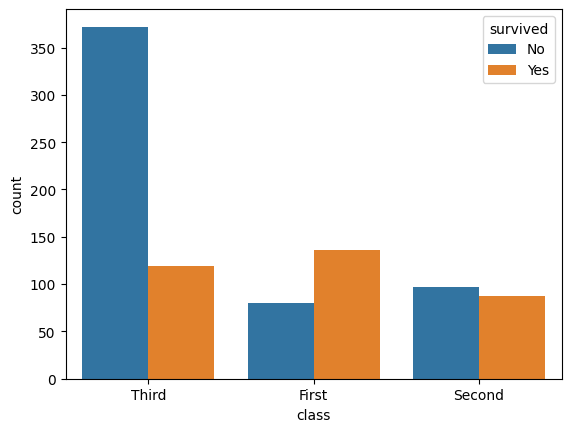

In [22]:
sns.countplot(data=data, x='class', hue='survived')

In [23]:
def plot_groupbar (data, x_column, legend_column):
    data.groupby([x_column, legend_column]).size().unstack().plot(kind='bar', stacked=False)
    plt.title(f'{legend_column} based on {x_column}')
    plt.xlabel(f'Passenger {x_column}')
    plt.ylabel('Count')
    plt.show()

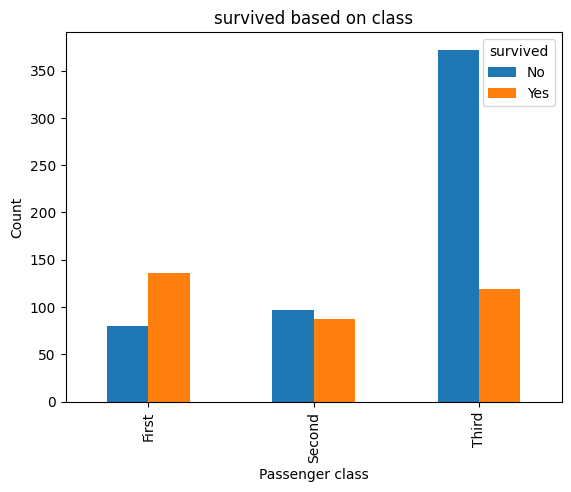

In [24]:
plot_groupbar (data, 'class', 'survived')

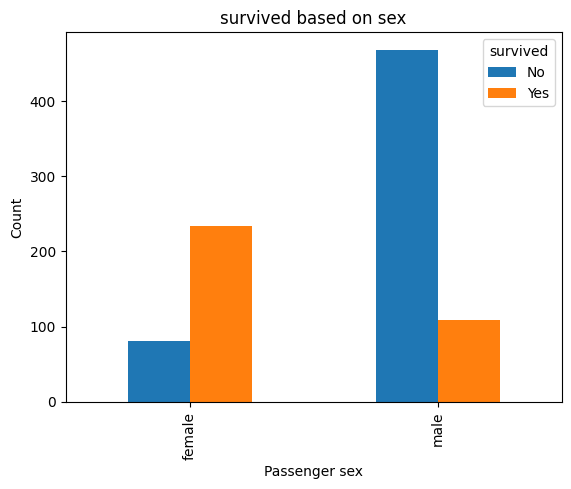

In [25]:
plot_groupbar (data, 'sex', 'survived')


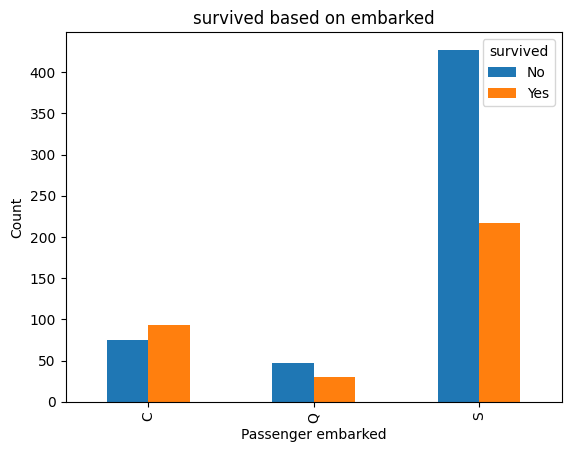

In [26]:
plot_groupbar (data, 'embarked', 'survived')


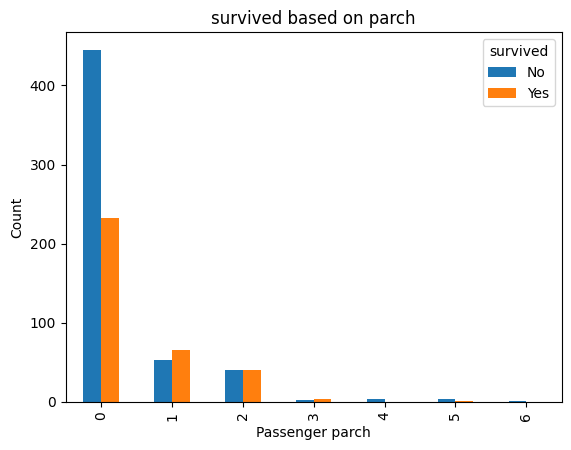

In [31]:
plot_groupbar (data, 'parch', 'survived')


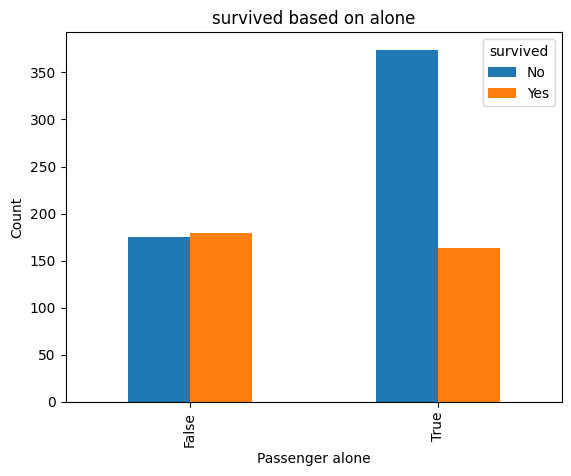

In [32]:
plot_groupbar (data, 'alone', 'survived')


In [27]:
def plot_groupbar (data, x_column, legend_column, to_stack=False):
    data.groupby([x_column, legend_column]).size().unstack().plot(kind='bar', stacked=to_stack)
    plt.title(f'{legend_column} based on {x_column}')
    plt.xlabel(f'Passenger {x_column}')
    plt.ylabel('Count')
    plt.show()

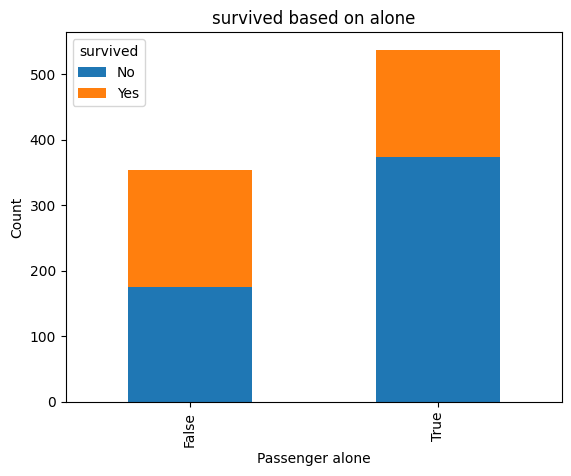

In [28]:
plot_groupbar (data, 'alone', 'survived', to_stack=True)

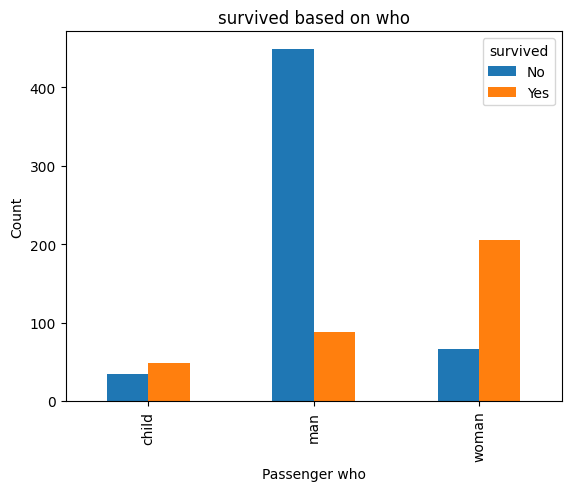

In [29]:
plot_groupbar (data, 'who', 'survived')


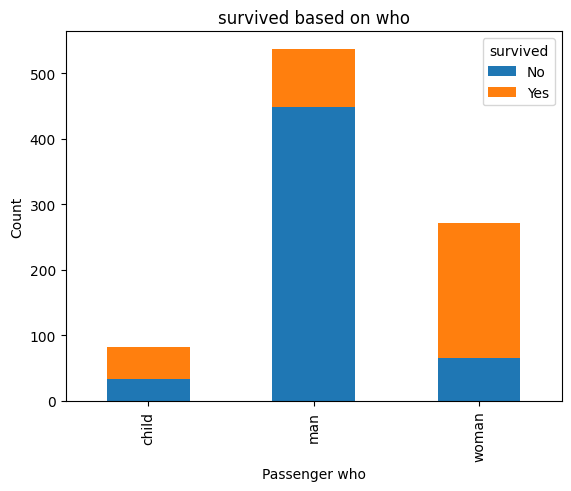

In [30]:
plot_groupbar (data, 'who', 'survived', to_stack=True)


In [35]:
data.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived', 'age_group'],
      dtype='object')

## age

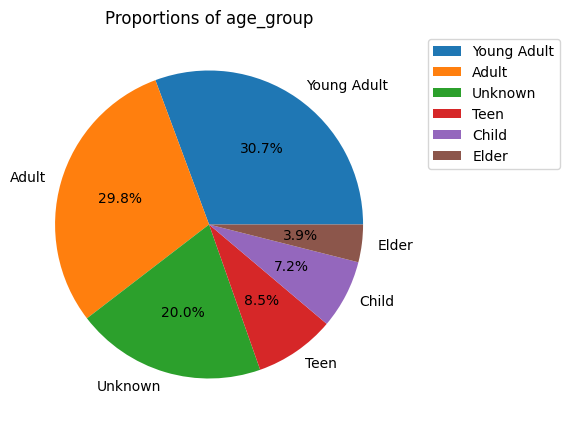

In [76]:
plot_piechart(data, 'age_group')

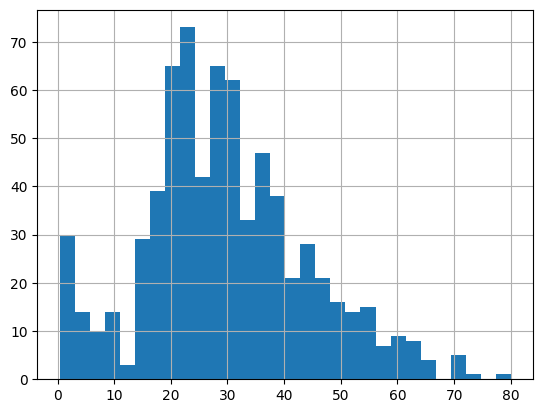

In [33]:
plt.hist(data['age'].sort_values(ascending=True), bins=30);
plt.grid()

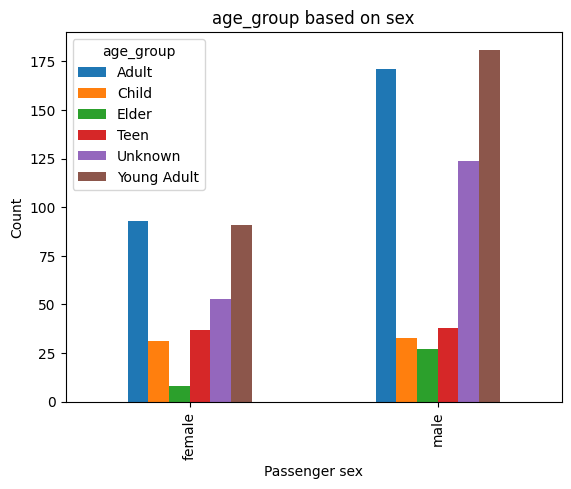

In [34]:
plot_groupbar (data, 'sex', 'age_group')

## sex

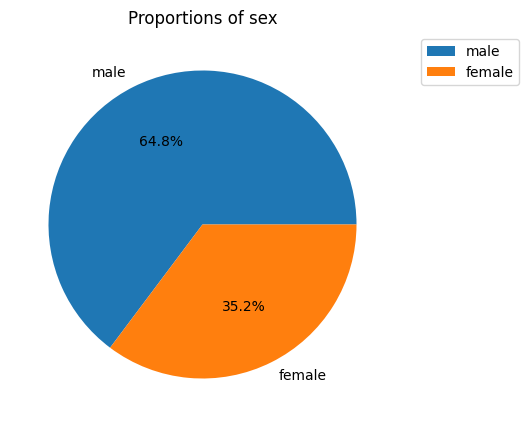

In [35]:
plot_piechart(data, 'sex')

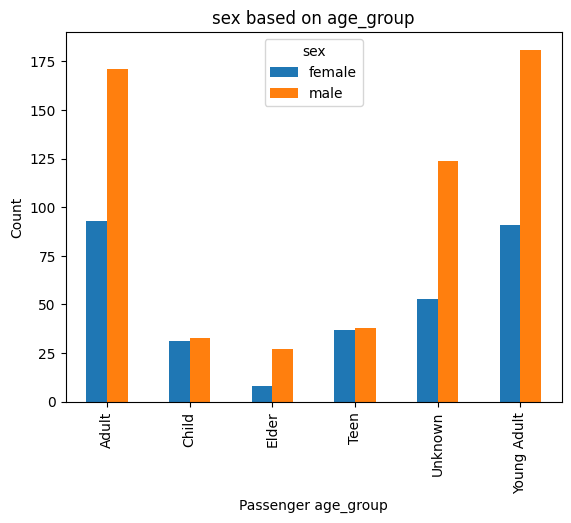

In [36]:
plot_groupbar (data,  'age_group', 'sex',)

In [41]:
data.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived', 'age_group'],
      dtype='object')

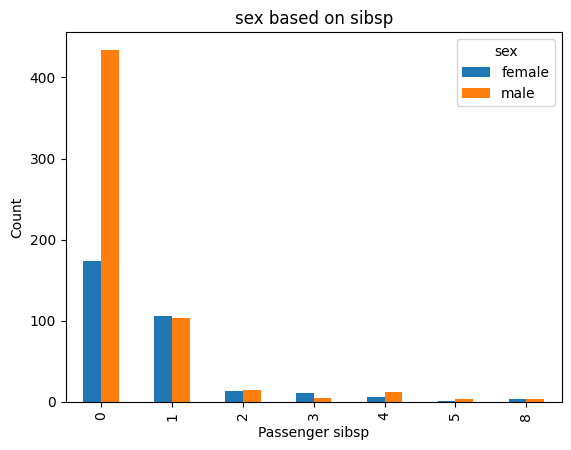

In [42]:
plot_groupbar(data, 'sibsp', 'sex')

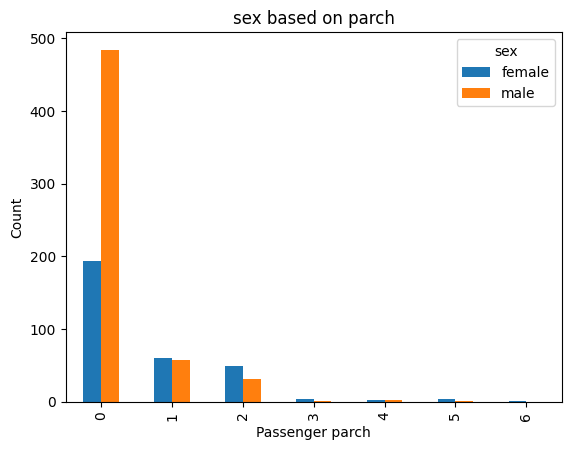

In [43]:
plot_groupbar(data, 'parch', 'sex')

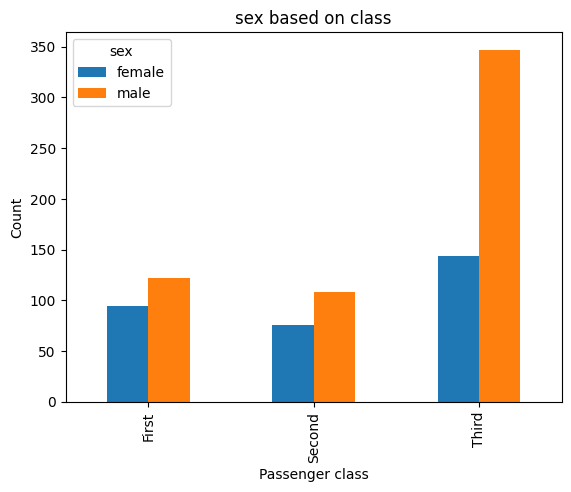

In [44]:
plot_groupbar(data, 'class', 'sex')

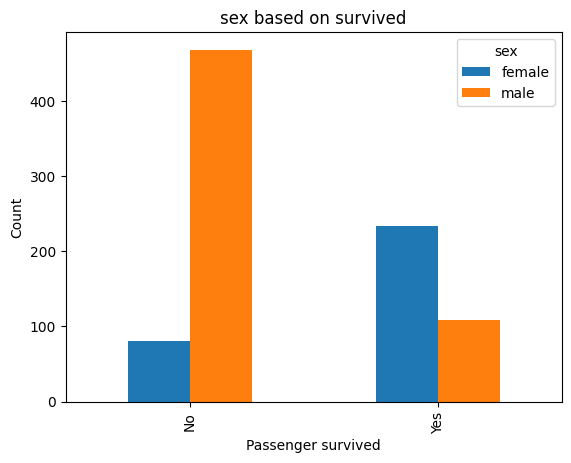

In [45]:
plot_groupbar(data, 'survived', 'sex')

## Fare

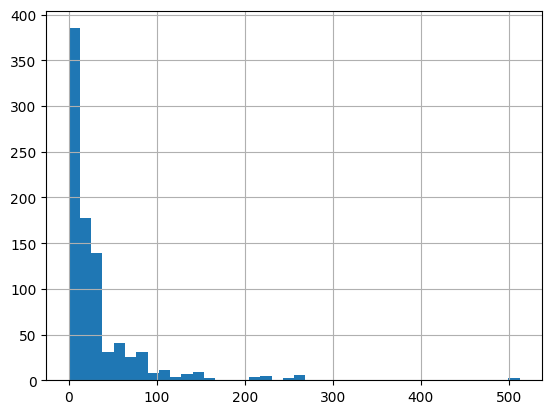

In [39]:
plt.hist(data['fare'], bins=40)
plt.grid()
plt.show()

# distribution plots

## boxplot

C:\Users\promi\AppData\Local\Temp\ipykernel_22348\2710192877.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='survived', y='age', palette='dark')


<Axes: xlabel='survived', ylabel='age'>

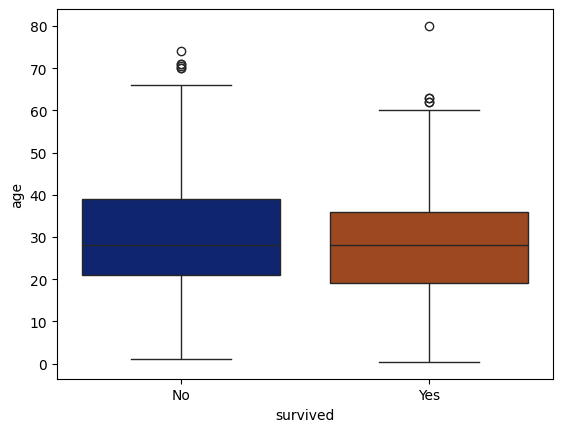

In [40]:
sns.boxplot(data=data, x='survived', y='age', palette='dark')

C:\Users\promi\AppData\Local\Temp\ipykernel_53120\3592141864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='survived', y='age', palette='dark')


(0.0, 40.0)

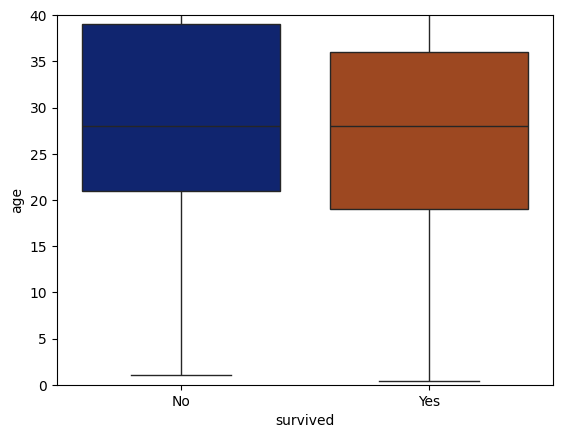

In [48]:
sns.boxplot(data=data, x='survived', y='age', palette='dark')
plt.ylim([0,40])

<Axes: xlabel='survived', ylabel='fare'>

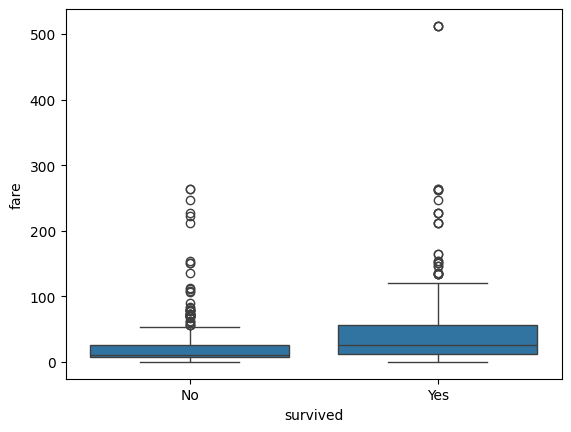

In [49]:
sns.boxplot(data=data, x='survived', y='fare')

C:\Users\promi\AppData\Local\Temp\ipykernel_53120\174039661.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='survived', y='fare', palette='dark')


<Axes: xlabel='survived', ylabel='fare'>

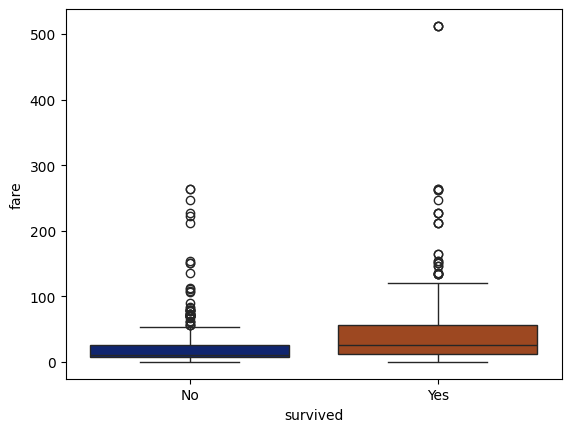

In [50]:
sns.boxplot(data=data, x='survived', y='fare', palette='dark')

C:\Users\promi\AppData\Local\Temp\ipykernel_53120\416369494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='survived', y='fare', palette='dark')


(0.0, 100.0)

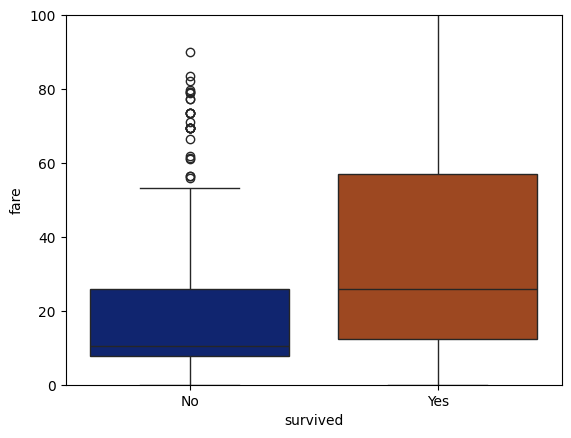

In [51]:
sns.boxplot(data=data, x='survived', y='fare', palette='dark')
plt.ylim([0,100])


C:\Users\promi\AppData\Local\Temp\ipykernel_53120\2200209464.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y='fare', palette='dark')


<Axes: xlabel='class', ylabel='fare'>

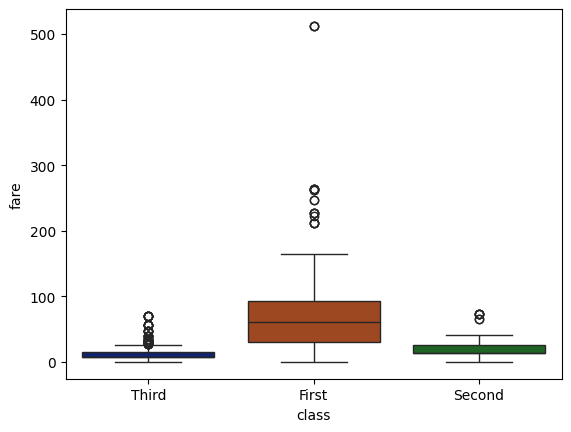

In [52]:
sns.boxplot(data=data, x='class', y='fare', palette='dark')


C:\Users\promi\AppData\Local\Temp\ipykernel_53120\3489991026.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y='fare', palette='dark')


(0.0, 100.0)

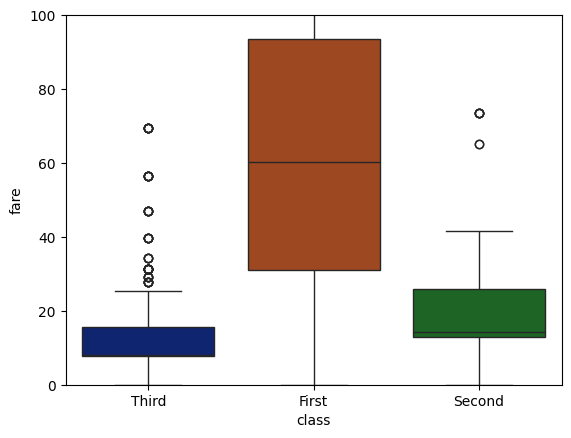

In [53]:
sns.boxplot(data=data, x='class', y='fare', palette='dark')
plt.ylim([0,100])


C:\Users\promi\AppData\Local\Temp\ipykernel_53120\973203598.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y='age', palette='dark')


<Axes: xlabel='class', ylabel='age'>

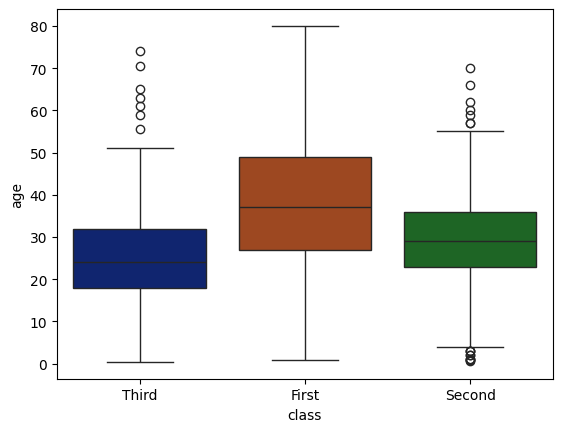

In [54]:
sns.boxplot(data=data, x='class', y='age', palette='dark')



### Violin plots

C:\Users\promi\AppData\Local\Temp\ipykernel_53120\3478668861.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='survived', y='age', palette='dark')


<Axes: xlabel='survived', ylabel='age'>

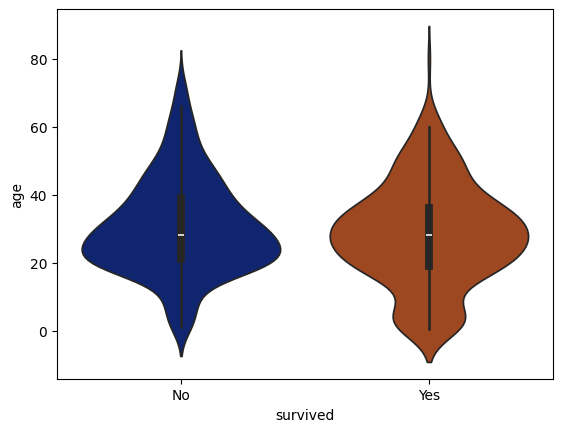

In [55]:
sns.violinplot(data=data, x='survived', y='age', palette='dark')

C:\Users\promi\AppData\Local\Temp\ipykernel_53120\3555635007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y='age', palette='dark')


Text(0.5, 1.0, 'Violin Plot ')

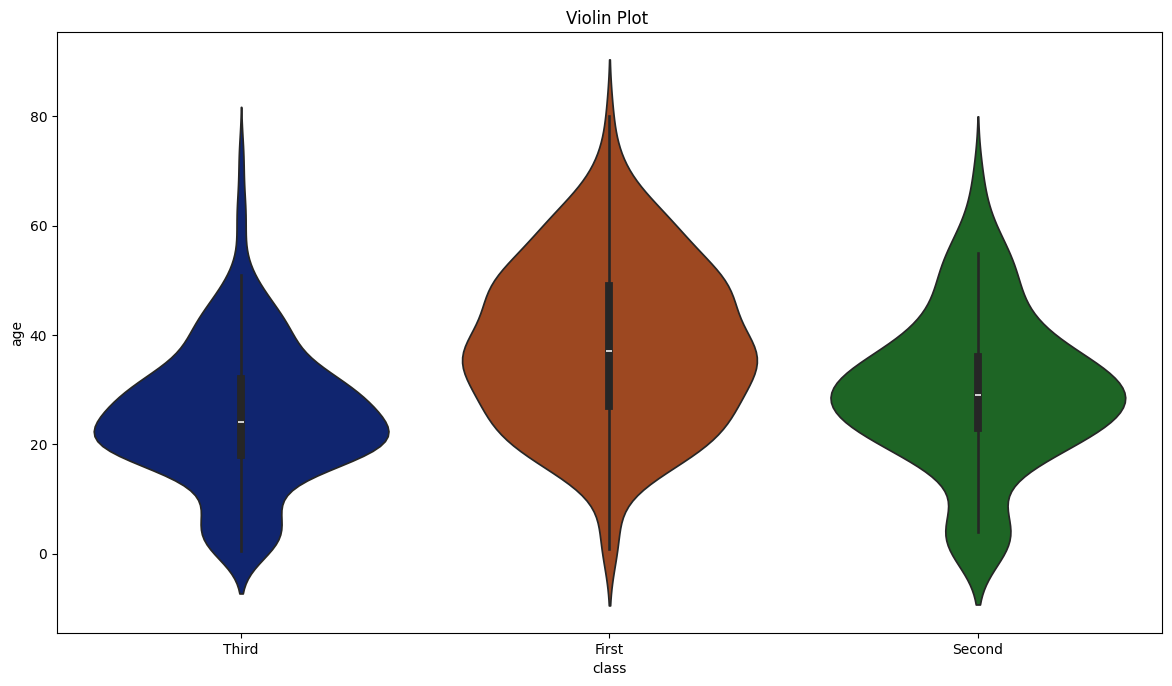

In [56]:
plt.figure(figsize=(14.26, 7.8))
sns.violinplot(data=data, x='class', y='age', palette='dark')
plt.title('Violin Plot ')

C:\Users\promi\AppData\Local\Temp\ipykernel_53120\2497563383.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='alone', y='age', palette='dark')


<Axes: xlabel='alone', ylabel='age'>

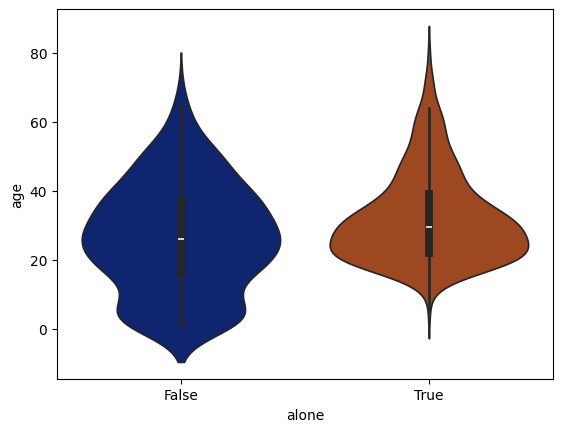

In [57]:
sns.violinplot(data=data, x='alone', y='age', palette='dark')

C:\Users\promi\AppData\Local\Temp\ipykernel_53120\3478668861.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='survived', y='age', palette='dark')


<Axes: xlabel='survived', ylabel='age'>

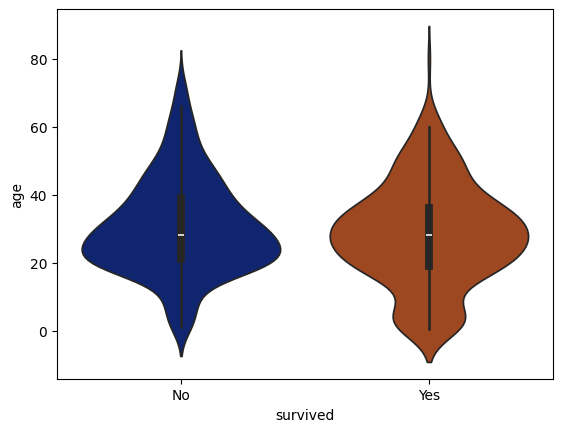

In [58]:
sns.violinplot(data=data, x='survived', y='age', palette='dark')

C:\Users\promi\AppData\Local\Temp\ipykernel_53120\1720347912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y='fare', palette='dark')


<Axes: xlabel='class', ylabel='fare'>

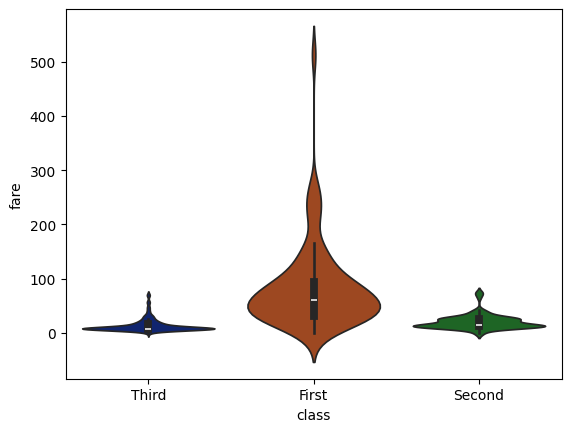

In [59]:
sns.violinplot(data=data, x='class', y='fare', palette='dark')


C:\Users\promi\AppData\Local\Temp\ipykernel_53120\750360894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='who', y='fare', palette='dark')


<Axes: xlabel='who', ylabel='fare'>

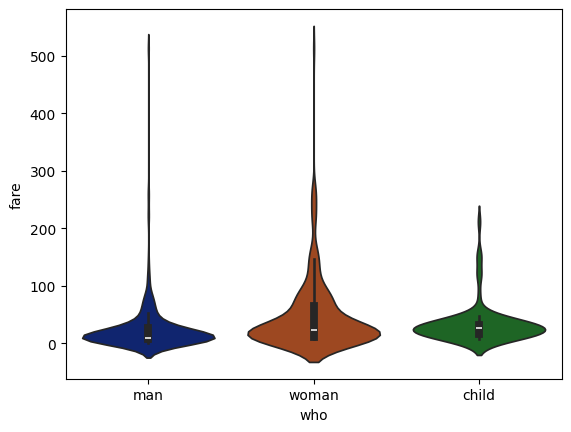

In [60]:
sns.violinplot(data=data, x='who', y='fare', palette='dark')


C:\Users\promi\AppData\Local\Temp\ipykernel_53120\2061090494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='age_group', y='fare', palette='dark')


<Axes: xlabel='age_group', ylabel='fare'>

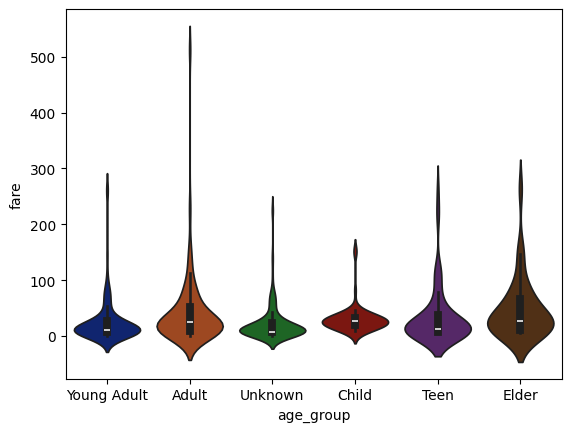

In [61]:
sns.violinplot(data=data, x='age_group', y='fare', palette='dark')


C:\Users\promi\AppData\Local\Temp\ipykernel_53120\1720347912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y='fare', palette='dark')


<Axes: xlabel='class', ylabel='fare'>

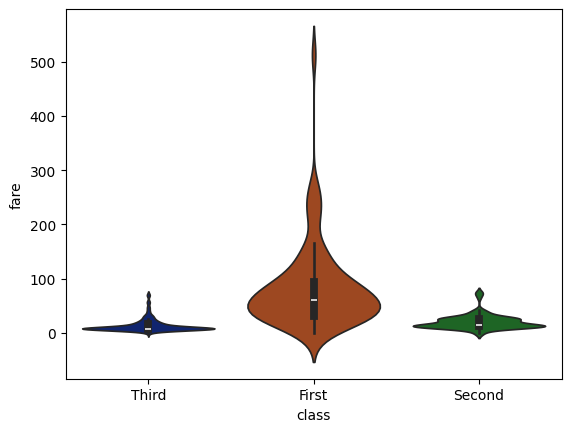

In [62]:
sns.violinplot(data=data, x='class', y='fare', palette='dark')


<Axes: xlabel='class', ylabel='age'>

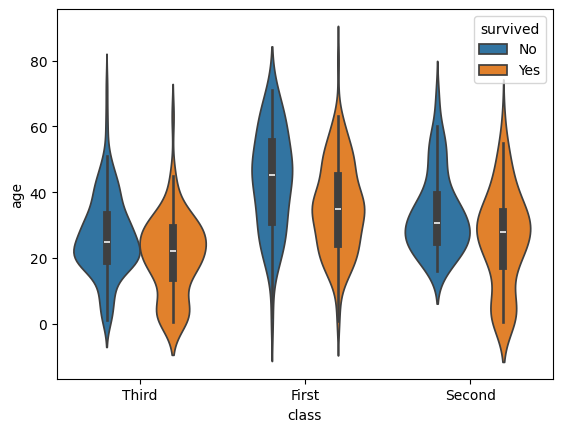

In [63]:
sns.violinplot(data=data, x='class', y='age', hue='survived')

<Axes: xlabel='class', ylabel='age'>

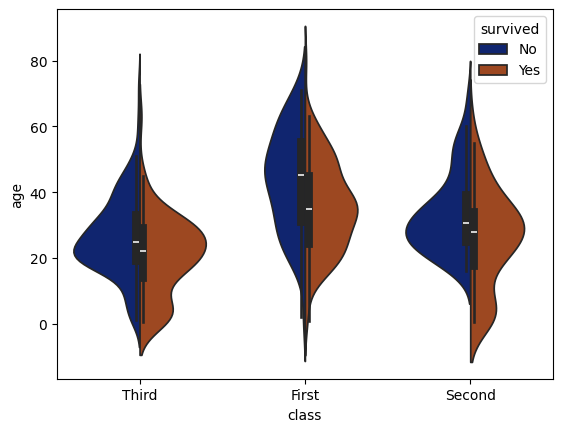

In [64]:
sns.violinplot(data=data, x='class', y='age', hue='survived', split=True, palette='dark')

<Axes: xlabel='sex', ylabel='age'>

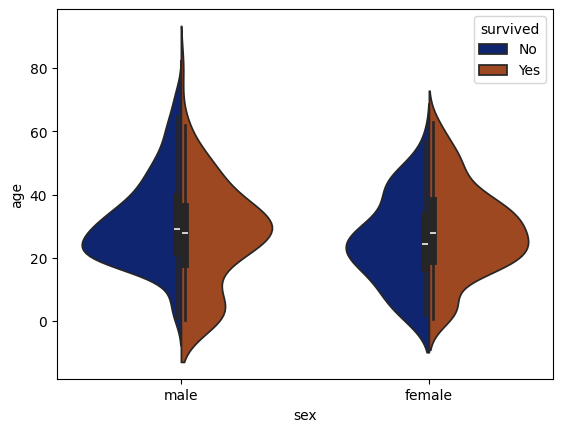

In [65]:
sns.violinplot(data=data, x='sex', y='age', hue='survived', split=True, palette='dark')


<Axes: xlabel='fare', ylabel='age'>

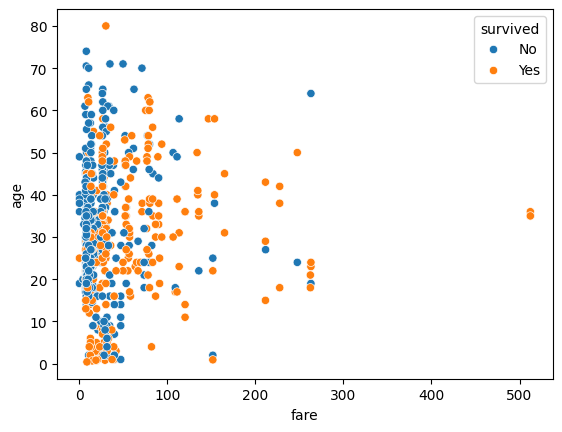

In [66]:
sns.scatterplot(data=data, x='fare', y='age', hue='survived')

<Axes: xlabel='fare', ylabel='age'>

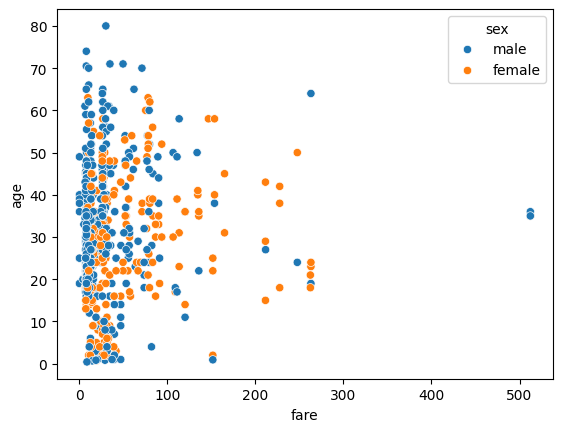

In [67]:
sns.scatterplot(data=data, x='fare', y='age', hue='sex')

## Correlation Matrix

In [41]:
data['survived_int']= data['survived'].replace({'No':0, 'Yes':1})

C:\Users\promi\AppData\Local\Temp\ipykernel_22348\3775705809.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['survived_int']= data['survived'].replace({'No':0, 'Yes':1})


In [42]:
#correlation between any two features with the Pandas method
data['survived_int'].corr(data['age'])

-0.07722109457217755

In [43]:
#select only the numeric columns in the DataFrame
data_numeric= data.select_dtypes(include=np.number)
data_numeric.corr()

,age,sibsp,parch,fare,survived_int
age,1.000000,-0.308247,-0.189119,0.096067,-0.077221
sibsp,-0.308247,1.000000,0.414838,0.159651,-0.035322
parch,-0.189119,0.414838,1.000000,0.216225,0.081629
fare,0.096067,0.159651,0.216225,1.000000,0.257307
survived_int,-0.077221,-0.035322,0.081629,0.257307,1.000000


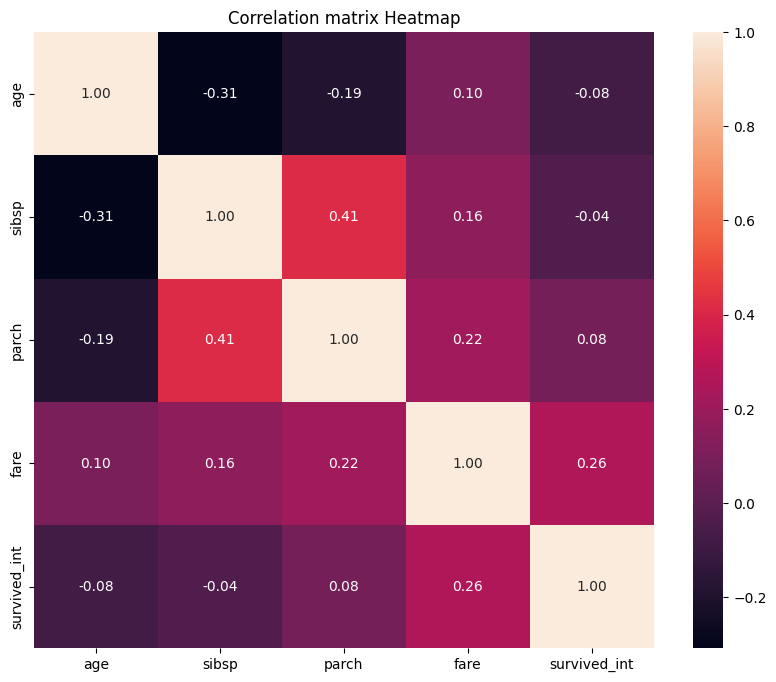

In [44]:
plt.figure(figsize=(10, 8))  
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f")
plt.title('Correlation matrix Heatmap')
plt.show()



make a blog post
medium, towards data an
https://medium.com/p/65b2b478c765/edit

# Summary


Based on the data analysis on the titanic data, Below is a summary of key findings:

Survivals:

Gender and Survival: Women had a significantly higher survival rate than men.

Passenger Class: First-class passengers had a higher survival rate, indicating socio-economic status played a role in survival chances.

Embarkation Port: The survival count varied based on the embarkation port, potentially reflecting the socio-economic distribution of passengers from these ports.

Fare Distribution: The majority of passengers paid lower fares, aligning with a larger number of third-class tickets.

Fare and Survival: Within each passenger class, there wasn't a consistent pattern to suggest that higher fares directly led to better survival chances.

Siblings/Spouses: Those with one sibling or spouse onboard seemed to have a slightly better survival rate than those alone or with many siblings/spouses.

Parents/Children: Passengers traveling alone or with one parent/child had higher survival rates compared to larger families.

Family Size: Solo travelers and those with a small family size (1-3 members) had better survival outcomes than larger families.

Titles and Survival: Certain titles extracted from names, potentially indicating social status or profession, had varied survival rates.

Age Distribution: Younger passengers (children) had a better survival rate, while the elderly had lower survival chances. Middle-aged individuals, especially males, formed the bulk of casualties.